<a href="https://colab.research.google.com/github/JonathanRosasV/PythonBasico2/blob/main/EDA_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Exploratorio de Datos (EDA) - Dataset Titanic

Este notebook contiene un análisis exploratorio completo del famoso dataset del Titanic.

## Objetivos:
- Explorar la estructura y características del dataset
- Identificar patrones y relaciones entre variables
- Analizar factores que influyeron en la supervivencia
- Preparar insights para modelado predictivo

## 1. Importación de Librerías

In [1]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Carga y Exploración Inicial del Dataset

In [2]:
# Cargar el dataset del Titanic
# Nota: Asegúrate de tener el archivo 'titanic.csv' en tu directorio de trabajo
# Puedes descargarlo de: https://www.kaggle.com/c/titanic/data

try:
    df = pd.read_csv('titanic.csv')
    print("Dataset cargado exitosamente")
except FileNotFoundError:
    # Si no tienes el archivo, creamos un dataset de ejemplo
    print("Archivo no encontrado. Creando dataset de ejemplo...")
    # Aquí podrías usar seaborn para cargar el dataset
    df = sns.load_dataset('titanic')
    print("Dataset de ejemplo cargado")

print(f"\nDimensiones del dataset: {df.shape}")
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")

Archivo no encontrado. Creando dataset de ejemplo...
Dataset de ejemplo cargado

Dimensiones del dataset: (891, 15)
Número de filas: 891
Número de columnas: 15


In [3]:
# Primeras 5 filas del dataset
print("Primeras 5 filas del dataset:")
df.head()

Primeras 5 filas del dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Información general del dataset
print("Información general del dataset:")
df.info()

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
# Descripción estadística de variables numéricas
print("Estadísticas descriptivas de variables numéricas:")
df.describe()

Estadísticas descriptivas de variables numéricas:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Diccionario de Datos

- **Survived:**  
  0 = Fallecido, 1 = Sobreviviente

- **Pclass:**  
  Clase del pasajero (1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase)

- **Name:**  
  Nombre del pasajero

- **Sex:**  
  Sexo del pasajero

- **Sibsp:**  
  Número de hermanos/esposos a bordo

- **Parch:**  
  Número de padres/hijos a bordo

- **Ticket:**  
  Número de boleto

- **Fare:**  
  Precio del boleto

- **Cabin:**  
  Número de cabina

- **Embarked:**  
  Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

## 3. Análisis de Valores Faltantes

In [6]:
# Análisis de valores faltantes
print("Valores faltantes por columna:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Columna': missing_data.index,
    'Valores_Faltantes': missing_data.values,
    'Porcentaje': missing_percent.values
})

missing_df = missing_df[missing_df['Valores_Faltantes'] > 0].sort_values('Valores_Faltantes', ascending=False)
print(missing_df)

Valores faltantes por columna:
        Columna  Valores_Faltantes  Porcentaje
11         deck                688   77.216611
3           age                177   19.865320
7      embarked                  2    0.224467
12  embark_town                  2    0.224467


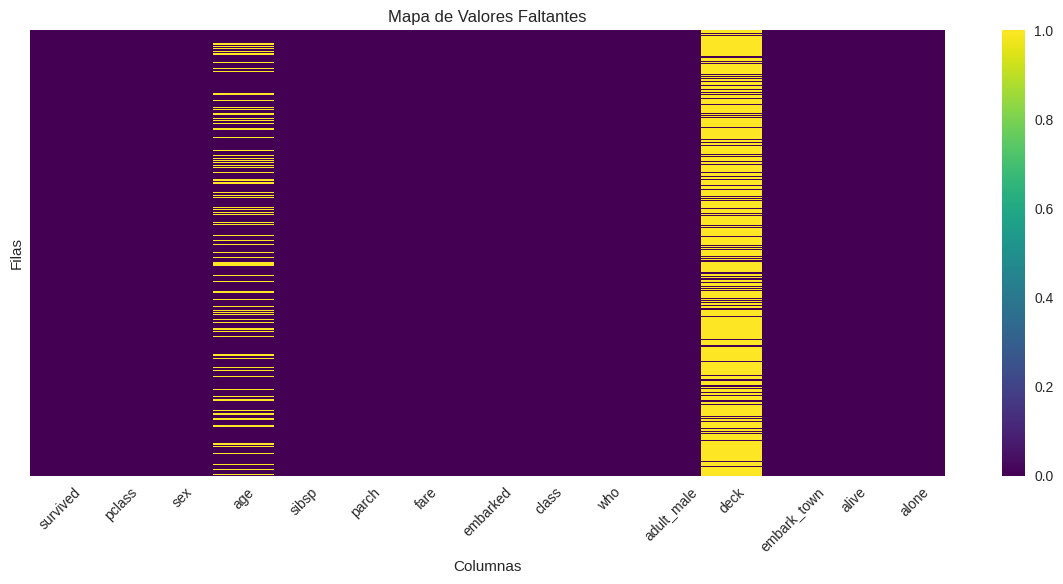

In [7]:
# Visualización de valores faltantes
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Mapa de Valores Faltantes')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Análisis de la Variable Objetivo: Supervivencia

Distribución de Supervivencia:
No sobrevivieron: 549 (61.6%)
Sobrevivieron: 342 (38.4%)


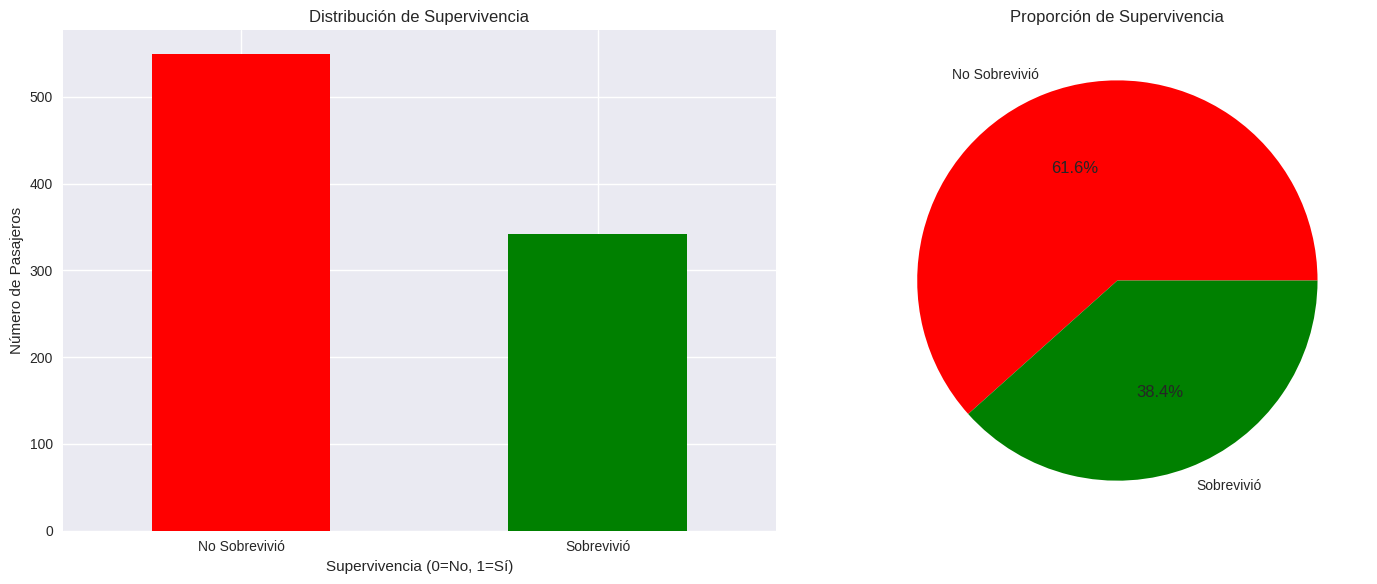

In [8]:
# Análisis de supervivencia
survival_counts = df['survived'].value_counts()
survival_percent = df['survived'].value_counts(normalize=True) * 100

print("Distribución de Supervivencia:")
print(f"No sobrevivieron: {survival_counts[0]} ({survival_percent[0]:.1f}%)")
print(f"Sobrevivieron: {survival_counts[1]} ({survival_percent[1]:.1f}%)")

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
survival_counts.plot(kind='bar', ax=ax1, color=['red', 'green'])
ax1.set_title('Distribución de Supervivencia')
ax1.set_xlabel('Supervivencia (0=No, 1=Sí)')
ax1.set_ylabel('Número de Pasajeros')
ax1.set_xticklabels(['No Sobrevivió', 'Sobrevivió'], rotation=0)

# Gráfico de pastel
ax2.pie(survival_counts.values, labels=['No Sobrevivió', 'Sobrevivió'],
        autopct='%1.1f%%', colors=['red', 'green'])
ax2.set_title('Proporción de Supervivencia')

plt.tight_layout()
plt.show()

## 5. Análisis por Género

Tabla de contingencia - Género vs Supervivencia:
survived    0    1  All
sex                    
female     81  233  314
male      468  109  577
All       549  342  891

Porcentajes por género:
survived          0          1
sex                           
female    25.796178  74.203822
male      81.109185  18.890815


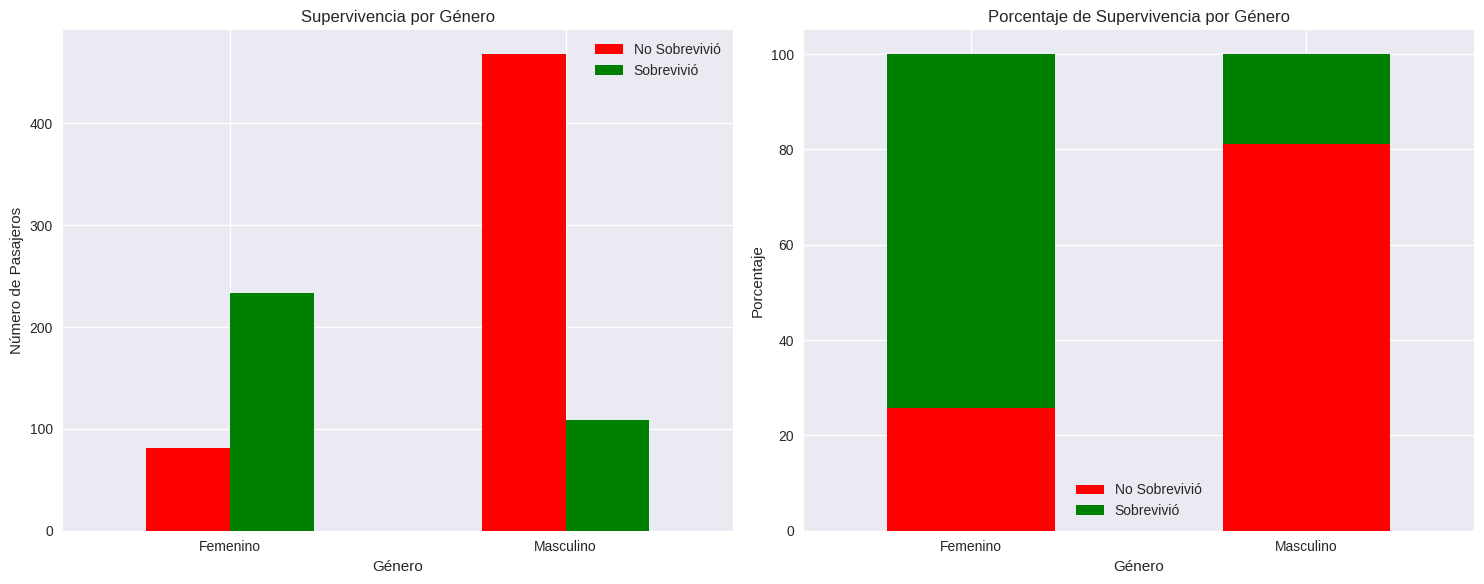

In [9]:
# Análisis de supervivencia por género
gender_survival = pd.crosstab(df['sex'], df['survived'], margins=True)
gender_survival_pct = pd.crosstab(df['sex'], df['survived'], normalize='index') * 100

print("Tabla de contingencia - Género vs Supervivencia:")
print(gender_survival)
print("\nPorcentajes por género:")
print(gender_survival_pct)

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras agrupadas
gender_survival.iloc[:-1, :-1].plot(kind='bar', ax=ax1, color=['red', 'green'])
ax1.set_title('Supervivencia por Género')
ax1.set_xlabel('Género')
ax1.set_ylabel('Número de Pasajeros')
ax1.legend(['No Sobrevivió', 'Sobrevivió'])
ax1.set_xticklabels(['Femenino', 'Masculino'], rotation=0)

# Gráfico de barras apiladas (porcentajes)
gender_survival_pct.plot(kind='bar', stacked=True, ax=ax2, color=['red', 'green'])
ax2.set_title('Porcentaje de Supervivencia por Género')
ax2.set_xlabel('Género')
ax2.set_ylabel('Porcentaje')
ax2.legend(['No Sobrevivió', 'Sobrevivió'])
ax2.set_xticklabels(['Femenino', 'Masculino'], rotation=0)

plt.tight_layout()
plt.show()

## 6. Análisis por Clase de Pasajero

Tabla de contingencia - Clase vs Supervivencia:
survived    0    1  All
pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891

Porcentajes por clase:
survived          0          1
pclass                        
1         37.037037  62.962963
2         52.717391  47.282609
3         75.763747  24.236253


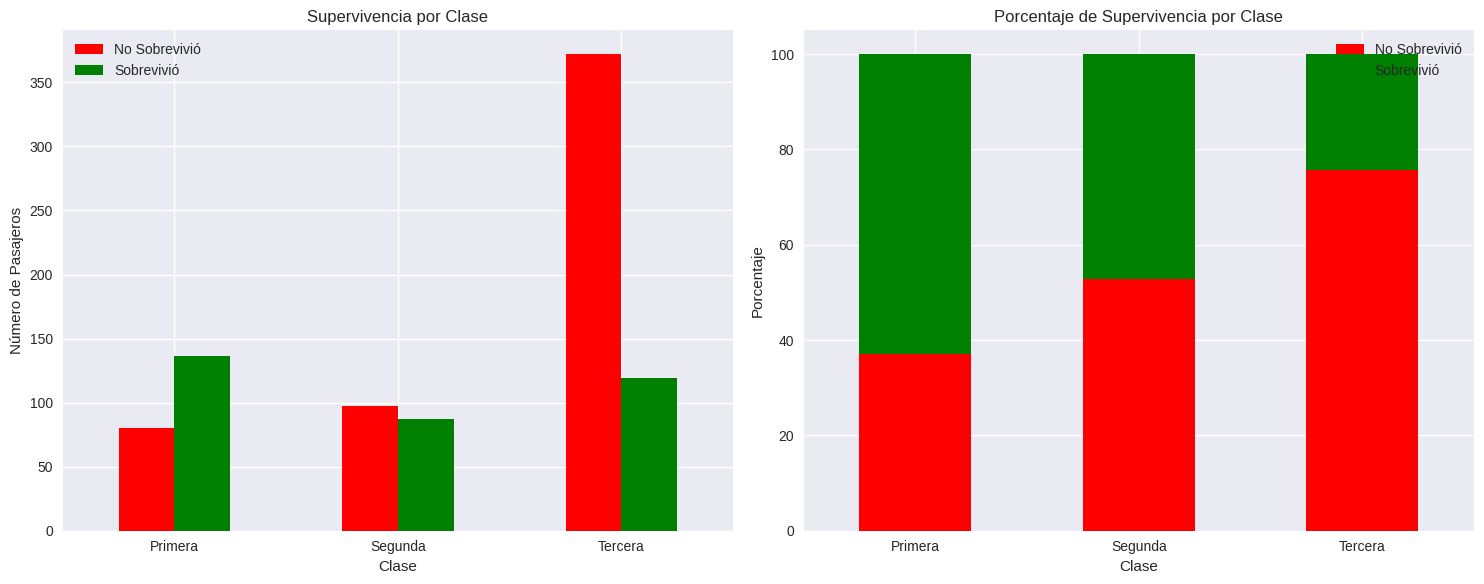

In [10]:
# Análisis de supervivencia por clase
class_survival = pd.crosstab(df['pclass'], df['survived'], margins=True)
class_survival_pct = pd.crosstab(df['pclass'], df['survived'], normalize='index') * 100

print("Tabla de contingencia - Clase vs Supervivencia:")
print(class_survival)
print("\nPorcentajes por clase:")
print(class_survival_pct)

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras agrupadas
class_survival.iloc[:-1, :-1].plot(kind='bar', ax=ax1, color=['red', 'green'])
ax1.set_title('Supervivencia por Clase')
ax1.set_xlabel('Clase')
ax1.set_ylabel('Número de Pasajeros')
ax1.legend(['No Sobrevivió', 'Sobrevivió'])
ax1.set_xticklabels(['Primera', 'Segunda', 'Tercera'], rotation=0)

# Gráfico de barras apiladas (porcentajes)
class_survival_pct.plot(kind='bar', stacked=True, ax=ax2, color=['red', 'green'])
ax2.set_title('Porcentaje de Supervivencia por Clase')
ax2.set_xlabel('Clase')
ax2.set_ylabel('Porcentaje')
ax2.legend(['No Sobrevivió', 'Sobrevivió'])
ax2.set_xticklabels(['Primera', 'Segunda', 'Tercera'], rotation=0)

plt.tight_layout()
plt.show()

## 7. Análisis de Edad

Estadísticas de edad:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


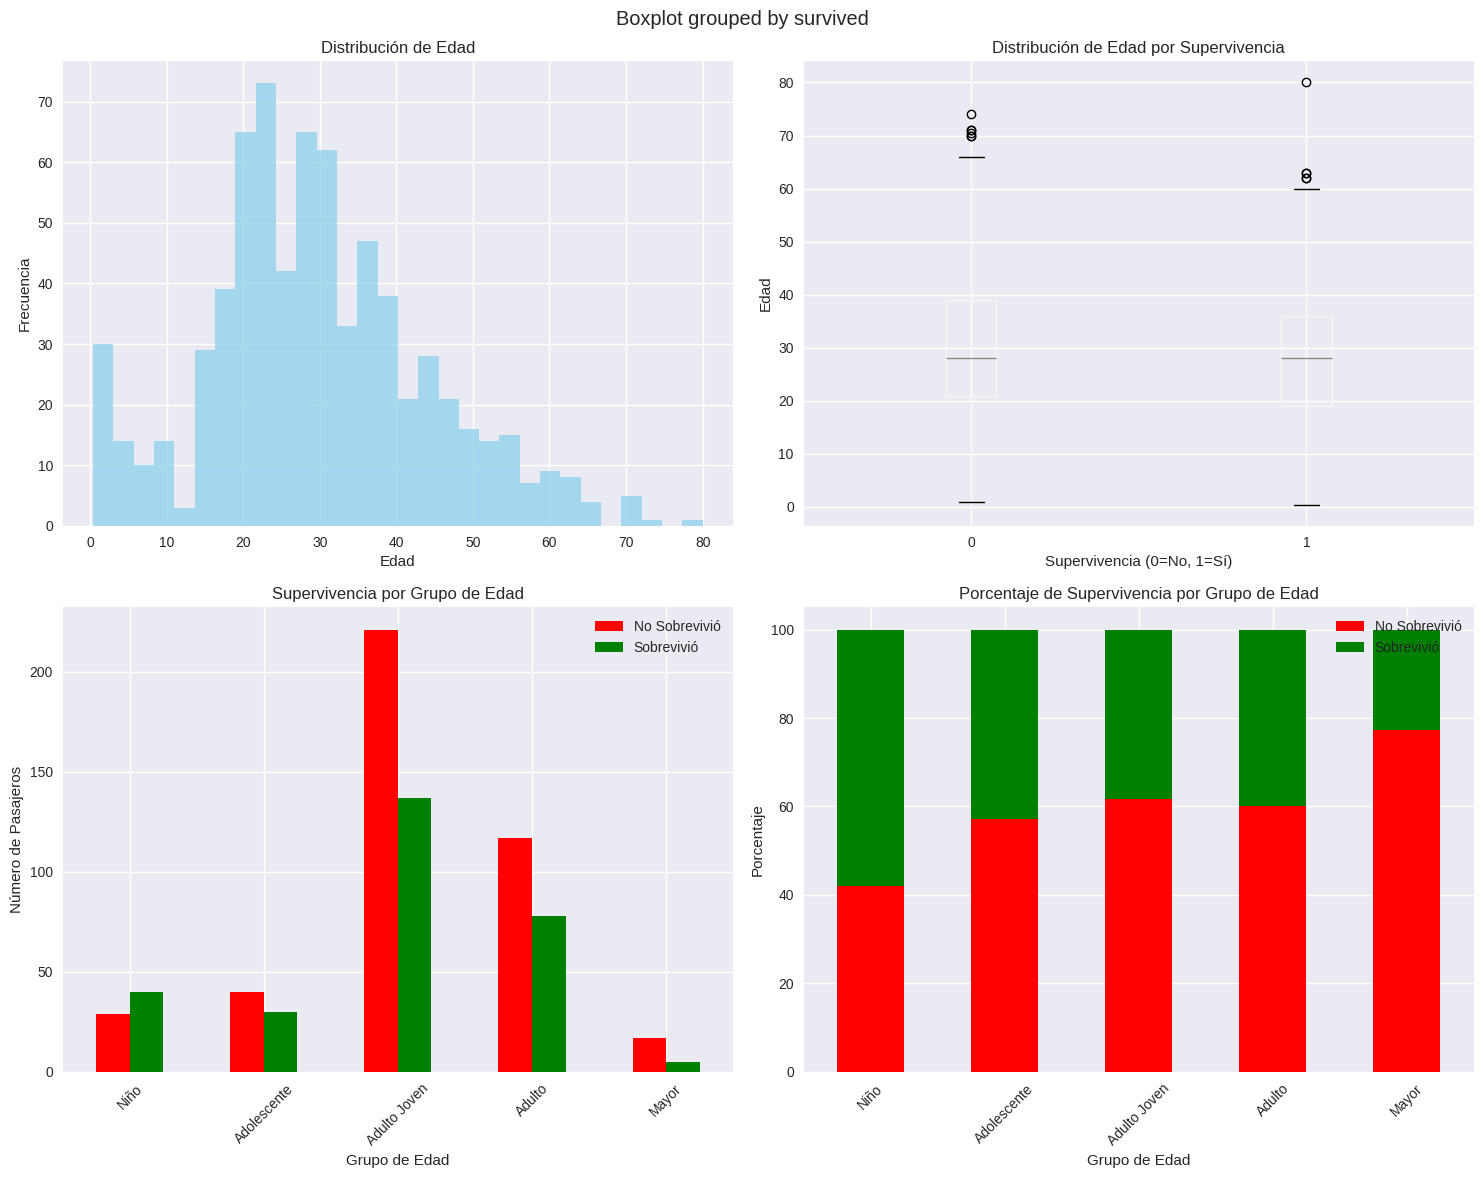

In [11]:
# Análisis de edad
print("Estadísticas de edad:")
print(df['age'].describe())

# Crear grupos de edad
df['age_group'] = pd.cut(df['age'],
                        bins=[0, 12, 18, 35, 60, 100],
                        labels=['Niño', 'Adolescente', 'Adulto Joven', 'Adulto', 'Mayor'])

# Visualización de distribución de edad
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Histograma de edad
df['age'].hist(bins=30, ax=ax1, alpha=0.7, color='skyblue')
ax1.set_title('Distribución de Edad')
ax1.set_xlabel('Edad')
ax1.set_ylabel('Frecuencia')

# Box plot de edad por supervivencia
df.boxplot(column='age', by='survived', ax=ax2)
ax2.set_title('Distribución de Edad por Supervivencia')
ax2.set_xlabel('Supervivencia (0=No, 1=Sí)')
ax2.set_ylabel('Edad')

# Supervivencia por grupo de edad
age_survival = pd.crosstab(df['age_group'], df['survived'])
age_survival.plot(kind='bar', ax=ax3, color=['red', 'green'])
ax3.set_title('Supervivencia por Grupo de Edad')
ax3.set_xlabel('Grupo de Edad')
ax3.set_ylabel('Número de Pasajeros')
ax3.legend(['No Sobrevivió', 'Sobrevivió'])
ax3.tick_params(axis='x', rotation=45)

# Porcentaje de supervivencia por grupo de edad
age_survival_pct = pd.crosstab(df['age_group'], df['survived'], normalize='index') * 100
age_survival_pct.plot(kind='bar', stacked=True, ax=ax4, color=['red', 'green'])
ax4.set_title('Porcentaje de Supervivencia por Grupo de Edad')
ax4.set_xlabel('Grupo de Edad')
ax4.set_ylabel('Porcentaje')
ax4.legend(['No Sobrevivió', 'Sobrevivió'])
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 8. Análisis de Familiares a Bordo

Distribución del tamaño de familia:
family_size
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64


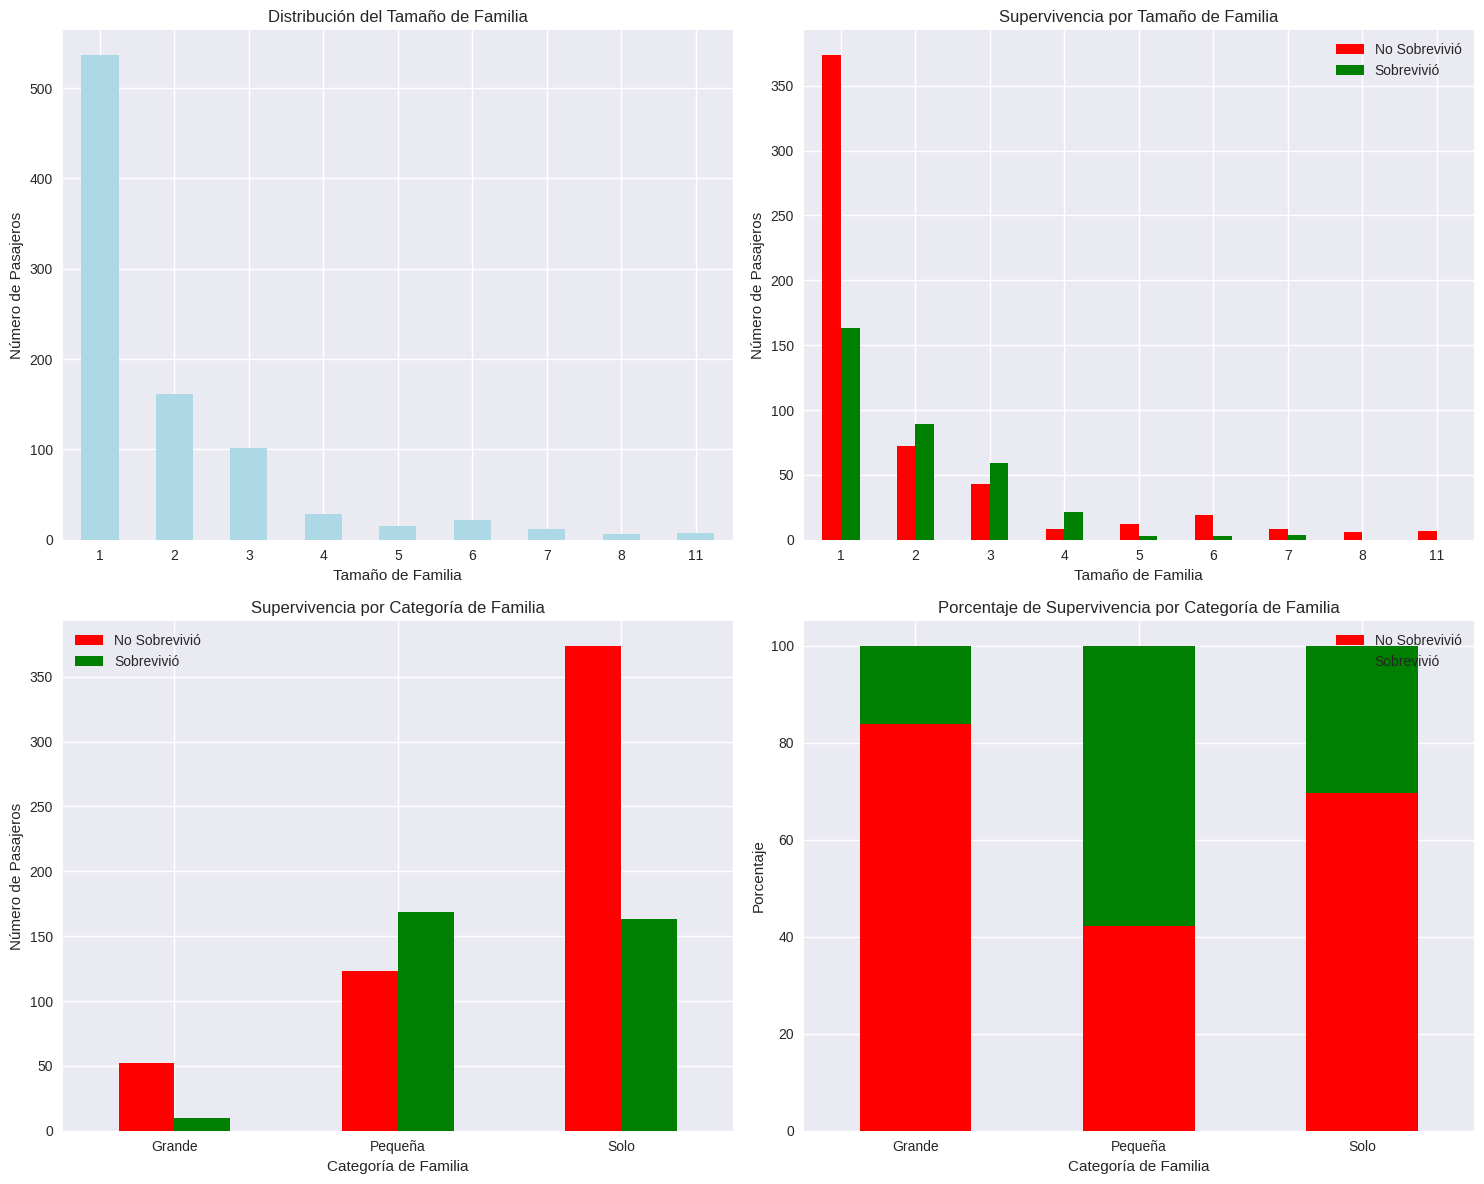

In [12]:
# Crear variable de tamaño de familia
df['family_size'] = df['sibsp'] + df['parch'] + 1  # +1 para incluir al pasajero mismo

# Categorizar tamaño de familia
df['family_category'] = df['family_size'].apply(lambda x: 'Solo' if x == 1
                                                else 'Pequeña' if x <= 4
                                                else 'Grande')

print("Distribución del tamaño de familia:")
print(df['family_size'].value_counts().sort_index())

# Visualización
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Distribución de tamaño de familia
df['family_size'].value_counts().sort_index().plot(kind='bar', ax=ax1, color='lightblue')
ax1.set_title('Distribución del Tamaño de Familia')
ax1.set_xlabel('Tamaño de Familia')
ax1.set_ylabel('Número de Pasajeros')
ax1.tick_params(axis='x', rotation=0)

# Supervivencia por tamaño de familia
family_survival = pd.crosstab(df['family_size'], df['survived'])
family_survival.plot(kind='bar', ax=ax2, color=['red', 'green'])
ax2.set_title('Supervivencia por Tamaño de Familia')
ax2.set_xlabel('Tamaño de Familia')
ax2.set_ylabel('Número de Pasajeros')
ax2.legend(['No Sobrevivió', 'Sobrevivió'])
ax2.tick_params(axis='x', rotation=0)

# Supervivencia por categoría de familia
family_cat_survival = pd.crosstab(df['family_category'], df['survived'])
family_cat_survival.plot(kind='bar', ax=ax3, color=['red', 'green'])
ax3.set_title('Supervivencia por Categoría de Familia')
ax3.set_xlabel('Categoría de Familia')
ax3.set_ylabel('Número de Pasajeros')
ax3.legend(['No Sobrevivió', 'Sobrevivió'])
ax3.tick_params(axis='x', rotation=0)

# Porcentaje de supervivencia por categoría de familia
family_cat_survival_pct = pd.crosstab(df['family_category'], df['survived'], normalize='index') * 100
family_cat_survival_pct.plot(kind='bar', stacked=True, ax=ax4, color=['red', 'green'])
ax4.set_title('Porcentaje de Supervivencia por Categoría de Familia')
ax4.set_xlabel('Categoría de Familia')
ax4.set_ylabel('Porcentaje')
ax4.legend(['No Sobrevivió', 'Sobrevivió'])
ax4.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## 9. Análisis de Tarifas

Estadísticas de tarifas:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


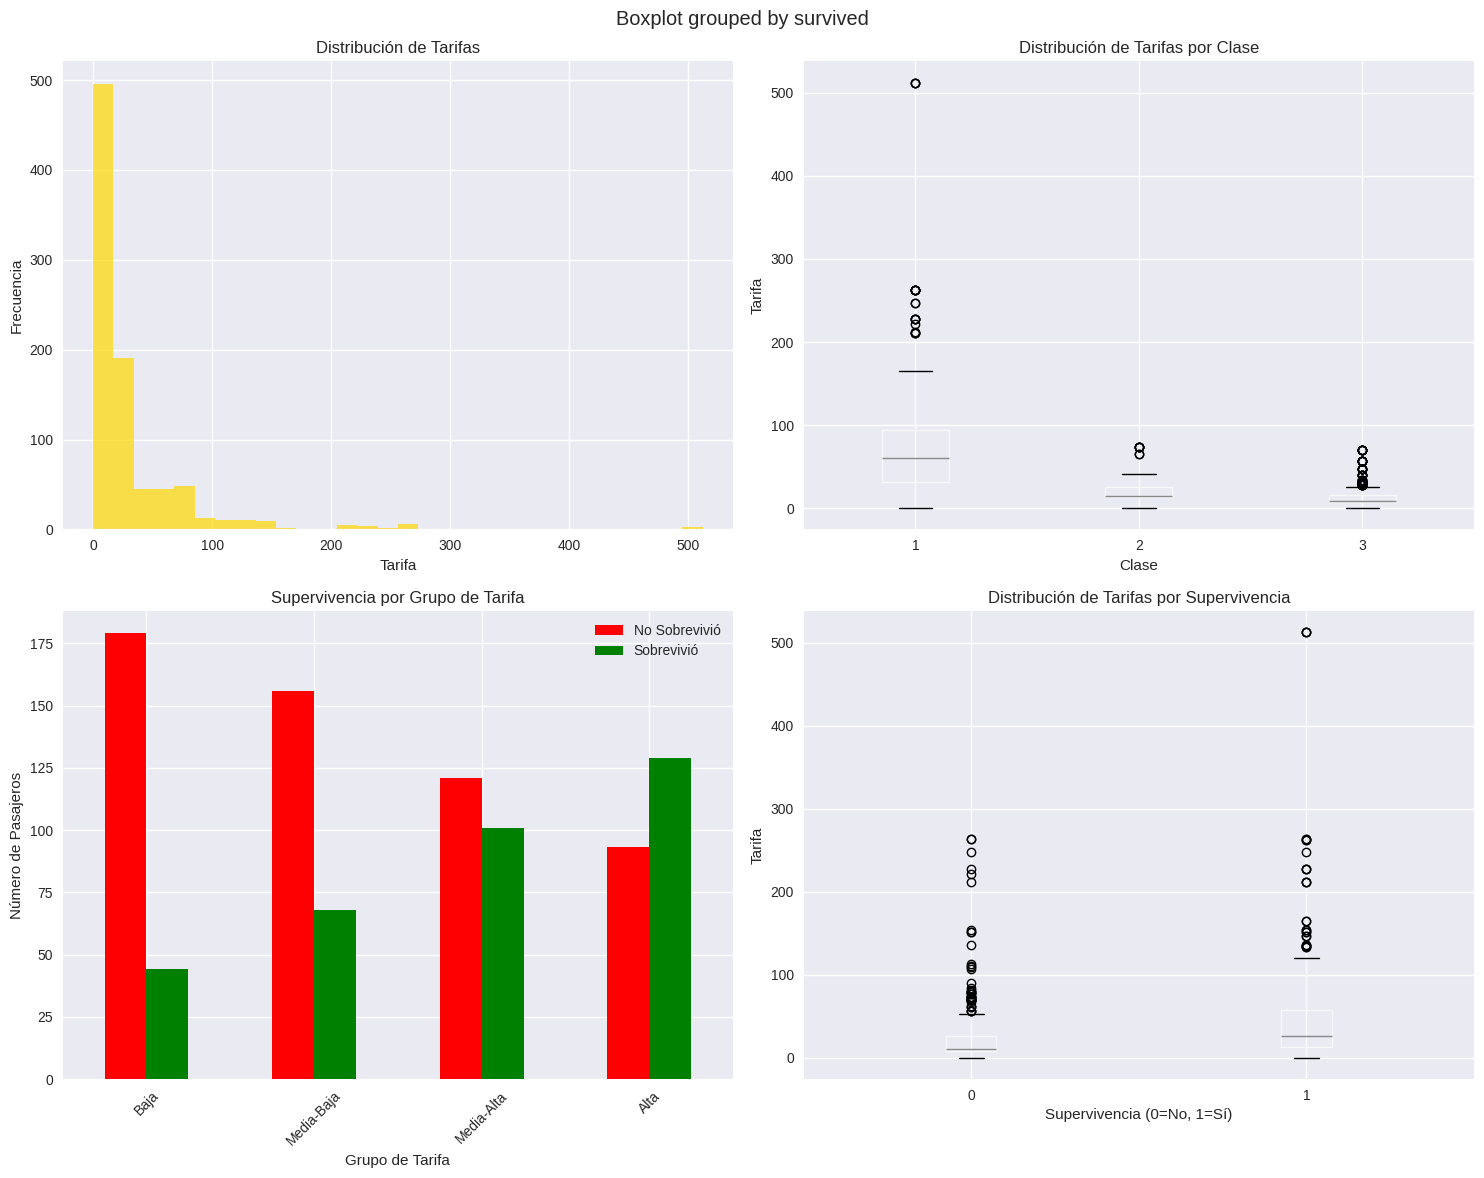

In [13]:
# Análisis de tarifas
print("Estadísticas de tarifas:")
print(df['fare'].describe())

# Crear grupos de tarifas
df['fare_group'] = pd.qcut(df['fare'], q=4, labels=['Baja', 'Media-Baja', 'Media-Alta', 'Alta'])

# Visualización
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Histograma de tarifas
df['fare'].hist(bins=30, ax=ax1, alpha=0.7, color='gold')
ax1.set_title('Distribución de Tarifas')
ax1.set_xlabel('Tarifa')
ax1.set_ylabel('Frecuencia')

# Box plot de tarifas por clase
df.boxplot(column='fare', by='pclass', ax=ax2)
ax2.set_title('Distribución de Tarifas por Clase')
ax2.set_xlabel('Clase')
ax2.set_ylabel('Tarifa')

# Supervivencia por grupo de tarifa
fare_survival = pd.crosstab(df['fare_group'], df['survived'])
fare_survival.plot(kind='bar', ax=ax3, color=['red', 'green'])
ax3.set_title('Supervivencia por Grupo de Tarifa')
ax3.set_xlabel('Grupo de Tarifa')
ax3.set_ylabel('Número de Pasajeros')
ax3.legend(['No Sobrevivió', 'Sobrevivió'])
ax3.tick_params(axis='x', rotation=45)

# Box plot de tarifas por supervivencia
df.boxplot(column='fare', by='survived', ax=ax4)
ax4.set_title('Distribución de Tarifas por Supervivencia')
ax4.set_xlabel('Supervivencia (0=No, 1=Sí)')
ax4.set_ylabel('Tarifa')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Tarifa pagada por pasajeros de 3ra clase')

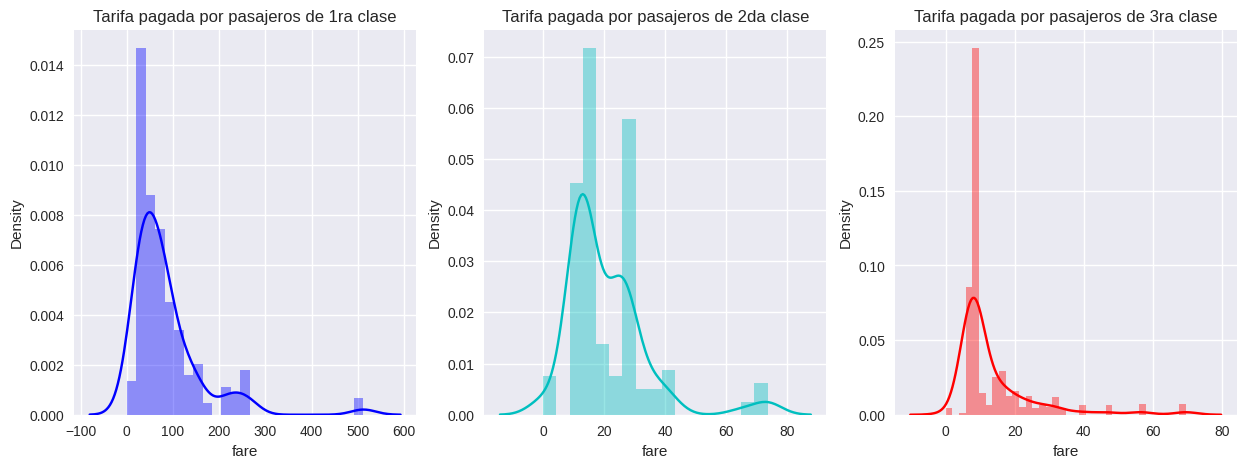

In [20]:
# Los pasajeros de clases más altas pagaron tarifas más elevadas.
# Es decir, a menor número de clase (Pclass), mayor será el valor de la tarifa (Fare).

_, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.distplot(df[df['pclass'] == 1]['fare'], ax=ax[0], color='b')
ax[0].set_title('Tarifa pagada por pasajeros de 1ra clase')

sns.distplot(df[df['pclass'] == 2]['fare'], ax=ax[1], color='c')
ax[1].set_title('Tarifa pagada por pasajeros de 2da clase')

sns.distplot(df[df['pclass'] == 3]['fare'], ax=ax[2], color='r')
ax[2].set_title('Tarifa pagada por pasajeros de 3ra clase')

# Se puede observar que los pasajeros de 1ra clase pagaron las tarifas más altas, seguidos por los de 2da y 3ra clase.

## 10. Análisis de Puerto de Embarque

Distribución por puerto de embarque:
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64


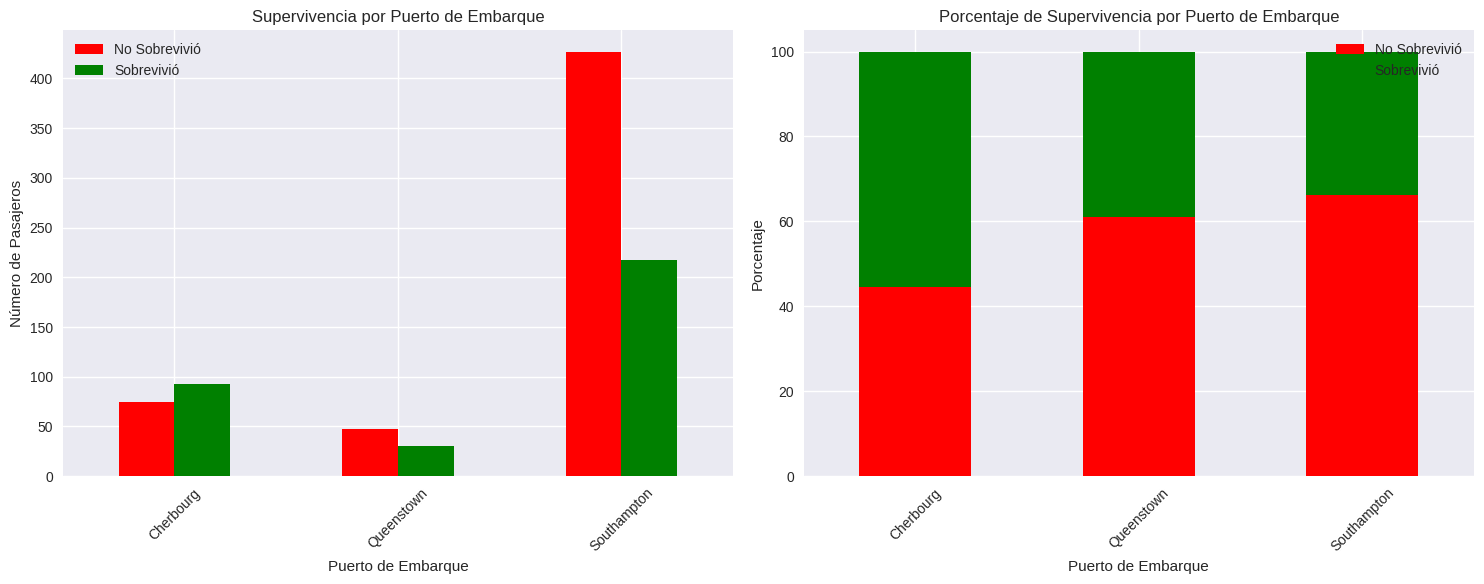

In [14]:
# Análisis de puerto de embarque
print("Distribución por puerto de embarque:")
print(df['embark_town'].value_counts())

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Supervivencia por puerto de embarque
embark_survival = pd.crosstab(df['embark_town'], df['survived'])
embark_survival.plot(kind='bar', ax=ax1, color=['red', 'green'])
ax1.set_title('Supervivencia por Puerto de Embarque')
ax1.set_xlabel('Puerto de Embarque')
ax1.set_ylabel('Número de Pasajeros')
ax1.legend(['No Sobrevivió', 'Sobrevivió'])
ax1.tick_params(axis='x', rotation=45)

# Porcentaje de supervivencia por puerto de embarque
embark_survival_pct = pd.crosstab(df['embark_town'], df['survived'], normalize='index') * 100
embark_survival_pct.plot(kind='bar', stacked=True, ax=ax2, color=['red', 'green'])
ax2.set_title('Porcentaje de Supervivencia por Puerto de Embarque')
ax2.set_xlabel('Puerto de Embarque')
ax2.set_ylabel('Porcentaje')
ax2.legend(['No Sobrevivió', 'Sobrevivió'])
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 11. Análisis Multivariado

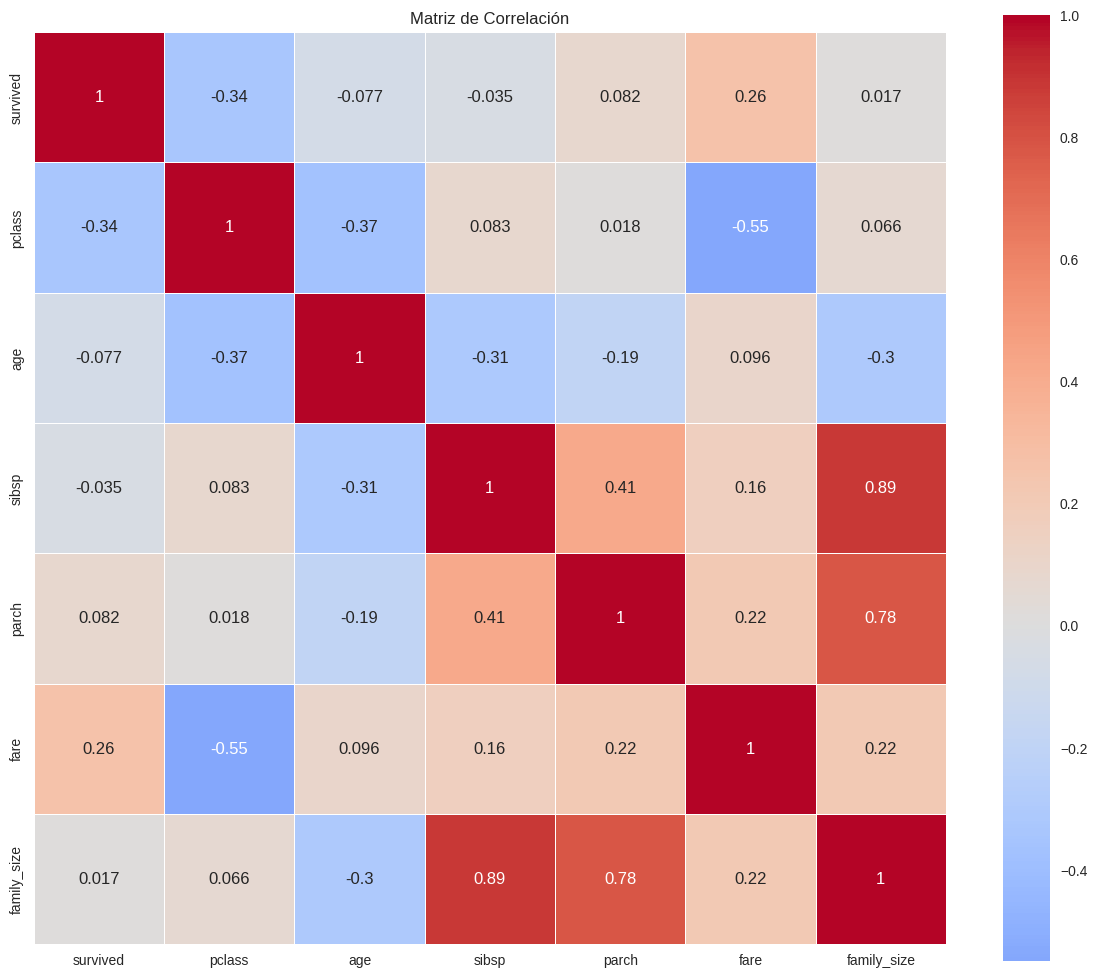

In [15]:
# Matriz de correlación
# Seleccionar solo variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

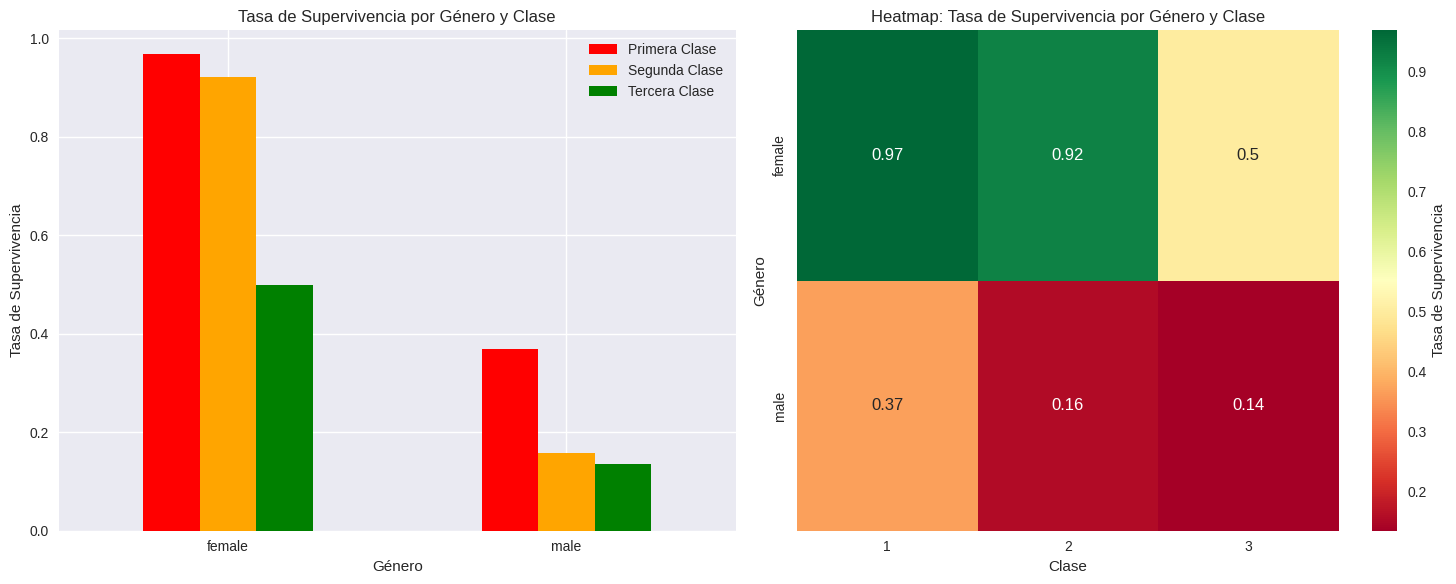

In [16]:
# Análisis combinado: Género, Clase y Supervivencia
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Supervivencia por género y clase
survival_by_sex_class = df.groupby(['sex', 'pclass'])['survived'].mean()
survival_by_sex_class.unstack().plot(kind='bar', ax=ax1, color=['red', 'orange', 'green'])
ax1.set_title('Tasa de Supervivencia por Género y Clase')
ax1.set_xlabel('Género')
ax1.set_ylabel('Tasa de Supervivencia')
ax1.legend(['Primera Clase', 'Segunda Clase', 'Tercera Clase'])
ax1.tick_params(axis='x', rotation=0)

# Heatmap de supervivencia por género y clase
pivot_table = df.pivot_table(values='survived', index='sex', columns='pclass', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='RdYlGn', ax=ax2, cbar_kws={'label': 'Tasa de Supervivencia'})
ax2.set_title('Heatmap: Tasa de Supervivencia por Género y Clase')
ax2.set_xlabel('Clase')
ax2.set_ylabel('Género')

plt.tight_layout()
plt.show()

## 12. Resumen de Insights Principales

In [17]:
# Calcular estadísticas clave para el resumen
total_passengers = len(df)
survival_rate = df['survived'].mean() * 100
female_survival_rate = df[df['sex'] == 'female']['survived'].mean() * 100
male_survival_rate = df[df['sex'] == 'male']['survived'].mean() * 100
first_class_survival = df[df['pclass'] == 1]['survived'].mean() * 100
third_class_survival = df[df['pclass'] == 3]['survived'].mean() * 100

print("=" * 60)
print("RESUMEN DE INSIGHTS PRINCIPALES - ANÁLISIS EDA TITANIC")
print("=" * 60)
print(f"\n📊 ESTADÍSTICAS GENERALES:")
print(f"   • Total de pasajeros: {total_passengers}")
print(f"   • Tasa general de supervivencia: {survival_rate:.1f}%")

print(f"\n👥 ANÁLISIS POR GÉNERO:")
print(f"   • Supervivencia mujeres: {female_survival_rate:.1f}%")
print(f"   • Supervivencia hombres: {male_survival_rate:.1f}%")
print(f"   • Las mujeres tuvieron {female_survival_rate/male_survival_rate:.1f}x más probabilidad de sobrevivir")

print(f"\n🎫 ANÁLISIS POR CLASE:")
print(f"   • Supervivencia Primera Clase: {first_class_survival:.1f}%")
print(f"   • Supervivencia Tercera Clase: {third_class_survival:.1f}%")
print(f"   • Diferencia entre clases: {first_class_survival - third_class_survival:.1f} puntos porcentuales")

print(f"\n👶 ANÁLISIS POR EDAD:")
children_survival = df[df['age'] <= 12]['survived'].mean() * 100
adults_survival = df[df['age'] > 12]['survived'].mean() * 100
print(f"   • Supervivencia niños (≤12 años): {children_survival:.1f}%")
print(f"   • Supervivencia adultos (>12 años): {adults_survival:.1f}%")

print(f"\n👨‍👩‍👧‍👦 ANÁLISIS FAMILIAR:")
solo_survival = df[df['family_size'] == 1]['survived'].mean() * 100
small_family_survival = df[(df['family_size'] > 1) & (df['family_size'] <= 4)]['survived'].mean() * 100
print(f"   • Supervivencia viajeros solos: {solo_survival:.1f}%")
print(f"   • Supervivencia familias pequeñas (2-4): {small_family_survival:.1f}%")

print(f"\n🔑 FACTORES CLAVE DE SUPERVIVENCIA:")
print(f"   1. Género: Ser mujer aumentó significativamente las probabilidades")
print(f"   2. Clase social: Primera clase tuvo mayor tasa de supervivencia")
print(f"   3. Edad: Los niños tuvieron ventaja en la supervivencia")
print(f"   4. Familia: Viajar con familia pequeña fue beneficioso")
print(f"   5. Tarifa: Tarifas más altas correlacionaron con mayor supervivencia")

print("\n" + "=" * 60)

RESUMEN DE INSIGHTS PRINCIPALES - ANÁLISIS EDA TITANIC

📊 ESTADÍSTICAS GENERALES:
   • Total de pasajeros: 891
   • Tasa general de supervivencia: 38.4%

👥 ANÁLISIS POR GÉNERO:
   • Supervivencia mujeres: 74.2%
   • Supervivencia hombres: 18.9%
   • Las mujeres tuvieron 3.9x más probabilidad de sobrevivir

🎫 ANÁLISIS POR CLASE:
   • Supervivencia Primera Clase: 63.0%
   • Supervivencia Tercera Clase: 24.2%
   • Diferencia entre clases: 38.7 puntos porcentuales

👶 ANÁLISIS POR EDAD:
   • Supervivencia niños (≤12 años): 58.0%
   • Supervivencia adultos (>12 años): 38.8%

👨‍👩‍👧‍👦 ANÁLISIS FAMILIAR:
   • Supervivencia viajeros solos: 30.4%
   • Supervivencia familias pequeñas (2-4): 57.9%

🔑 FACTORES CLAVE DE SUPERVIVENCIA:
   1. Género: Ser mujer aumentó significativamente las probabilidades
   2. Clase social: Primera clase tuvo mayor tasa de supervivencia
   3. Edad: Los niños tuvieron ventaja en la supervivencia
   4. Familia: Viajar con familia pequeña fue beneficioso
   5. Tarifa: Ta

## 13. Conclusiones y Recomendaciones

### Principales Hallazgos:

1. **Protocolo "Mujeres y niños primero"**: Se evidencia claramente en los datos, con una tasa de supervivencia femenina significativamente mayor.

2. **Desigualdad socioeconómica**: La clase del pasajero fue un factor determinante, reflejando las diferencias en el acceso a botes salvavidas.

3. **Importancia del contexto familiar**: Los pasajeros con familias pequeñas tuvieron mejores tasas de supervivencia que los viajeros solos o familias muy grandes.

4. **Correlación precio-supervivencia**: Las tarifas más altas correlacionaron con mayor supervivencia, probablemente debido a mejores ubicaciones de cabinas.

### Para Modelado Predictivo:

- **Variables más importantes**: Género, Clase, Edad, Tamaño de familia
- **Tratamiento de datos faltantes**: Especial atención a la variable Edad
- **Feature Engineering**: Considerar crear variables combinadas (ej: Mujer + Primera Clase)
- **Balanceo de clases**: Considerar técnicas de balanceo dado el desbalance en supervivencia

Este análisis proporciona una base sólida para desarrollar modelos predictivos de supervivencia en el Titanic.